In [1]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt

import cv2

In [20]:
def selective_search(image_path):

    image = cv2.imread(image_path)

    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()

    rects = ss.process()

    return image, rects

def visualize_proposals(image, rects, num_proposals=10):

    output_image = image.copy()

    for i, rect in enumerate(rects):
        if i < num_proposals:
            x, y, w, h = rect
            cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    cv2.imshow('Output', output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [2]:
# Load your image
image = cv2.imread('two_labs.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


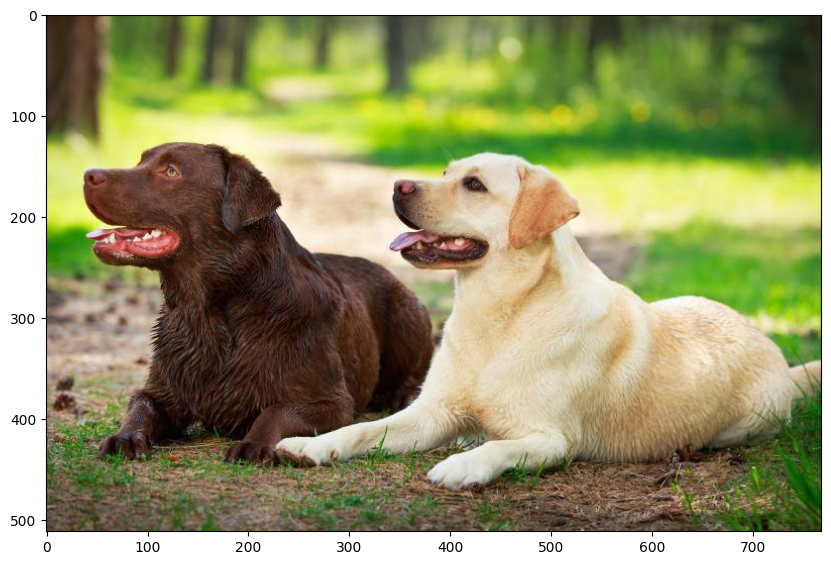

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.show()

In [4]:
# Create a selective search segmentation object
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# Switch to fast or quality mode
# ss.switchToSelectiveSearchFast()
ss.switchToSelectiveSearchQuality()

# Run selective search
rects = ss.process()

In [17]:
output_image = image_rgb.copy()

# Iterate over the first numShowRects region proposals
for i, rect in enumerate(rects[:200]):
    x, y, w, h = rect
    cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 255), 1, cv2.LINE_AA)

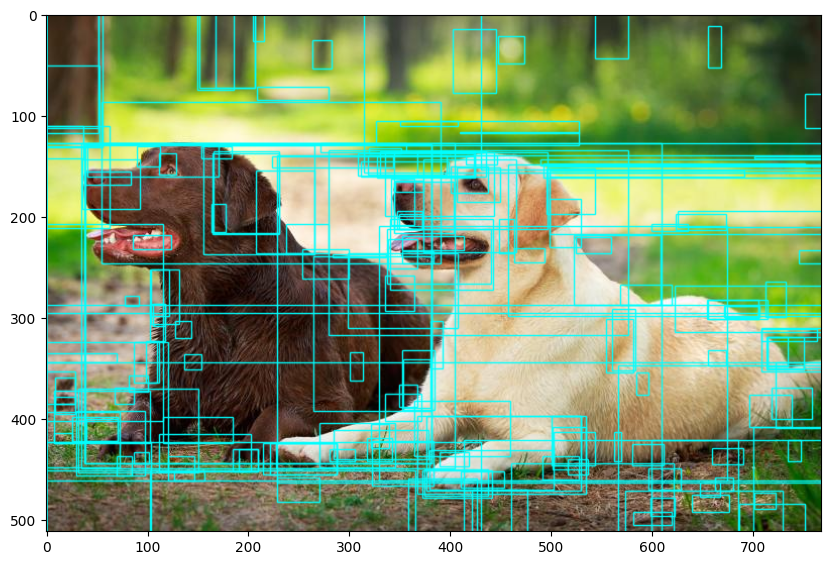

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.show()